<h1>Data Analysis of Brazillian Interest Rate and Inflation Rate</h1> 
Author: <a href=https://www.linkedin.com/in/mailson-p-92909928a/> Mailson Vieira Passos <a/>

<hr>

<h3>Data Schema</h3>

#### Monthly 

| Variable | Description                                                          |
|---------------------------|-------------------------------------------------------------------------------------------|
| periodo-mes               | YYYY-MM format month                                      |
| mes                       | The first three letters of the respective month|
|  ano                      | 4-digit year                                                              |	
| decada                    | 4-digit decade                                                         |
| meta_acumulada_mes        | Monthly accumulated target interest rate.                | 
| selic_acumulada_mes       | Monthly accumulated interest rate.                      |
| ipca_mes                  | Monthly Inflation rate.                                        |

#### Annual 

| Variable | Description                                              |
|---------------------------|---------------------------------------------------------------------------|
| ano                       | 4-digit numeric year                |
| decada                    | 4-digit numeric decade              | 
| meta_selic_noano          | Annual accumulated target interest rate |
| selic_acumulada_ano       | Annual accumulated interest rate            |
| ipca_acumulado_ano        | Annual accumulated inflation rate           | 



<hr>

<h2><span id='Objective'>Objective</span></h2>
<ul>
    <li>Analyze the data</li>
</ul>

<hr>
<h2>Requirements</h2>

```python
!pip install pandas==2.0.0
!pip install numpy==1.26.1
!pip install matplotlib==3.8.0
!pip install seaborn==0.13.2
!pip install plotly==5.17.0
!pip install statsmodels==0.14.2
!pip install ipywidgets==8.1.1
```
<hr>

<h2><span id='Data Analysis'></span>Data Analysis</h2>

We start by importing the necessary libraries

In [45]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

We read the data

In [46]:
selic_ipca_mes_df = pd.read_csv('dados/selic_ipca_mes.tsv', sep ='\t')
selic_ipca_ano_df = pd.read_csv('dados/selic_ipca_ano.tsv', sep = '\t')

And we check the types

In [47]:
selic_ipca_mes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   periodo_mes          343 non-null    object 
 1   mes                  343 non-null    object 
 2   ano                  343 non-null    int64  
 3   decada               343 non-null    int64  
 4   meta_acumulada_mes   311 non-null    float64
 5   selic_acumulada_mes  343 non-null    float64
 6   ipca_mes             343 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 18.9+ KB


Unfortunately, pandas cannot infer some types like period from the tsv file. We will also need to create a timestamp column, so the period can be interpreted by matplotlib

In [48]:
selic_ipca_mes_df['periodo_mes'] = pd.PeriodIndex(selic_ipca_mes_df['periodo_mes'], freq = 'M')
selic_ipca_mes_df['periodo_timeformat'] = selic_ipca_mes_df['periodo_mes'].dt.to_timestamp()

We order the mes (month) column, as it is string-type column.

In [49]:
selic_ipca_mes_df['mes'] = pd.Categorical(
    selic_ipca_mes_df['mes'], 
    ordered=True, 
    categories = selic_ipca_mes_df.query('ano == 2000')['mes'].to_list()
)

We can now plot the monthly data to get a better sense of it

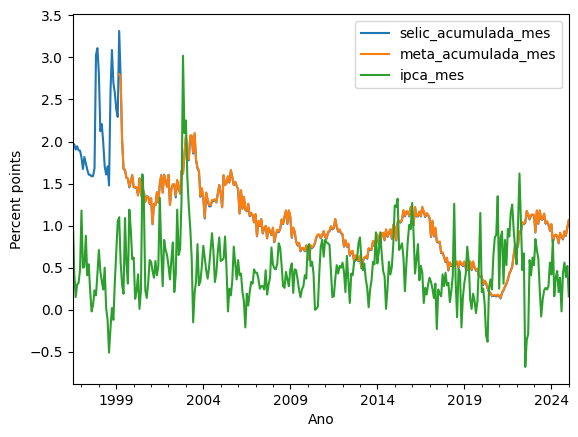

In [50]:
selic_ipca_mes_df.plot(y = ['selic_acumulada_mes', 'meta_acumulada_mes', 'ipca_mes'], x = 'periodo_mes')
plt.ylabel('Percent points')
plt.xlabel('Ano')
plt.show()

It's hard to not notice that there no significant difference between the target interest rate (meta) and the monthly interest rate (selic). The only noticeable difference is that the selic spans a much longer period than the target, as it was established in 1999. Moreover, the highest difference between their annual versions was only 0.4 percentage points. For this reason, we will focus only on the interest rate.

Considering that we have a time series, we are going to pivot the data as it makes it easier to study. So we begin with interest rate (selic)

In [51]:
selic_pivmensal = selic_ipca_mes_df.pivot(index = 'ano', columns = 'mes', values = 'selic_acumulada_mes')
selic_pivmensal.head()

mes,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ
ano,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,1.928529,1.967890,1.904054,1.943610,1.895246,1.891396
1997,1.810888,1.672563,1.816281,1.739499,1.664644,1.606783,1.603456,1.585780,1.590376,1.685632,3.030518,3.109875
1998,2.804617,2.123380,2.206511,1.989665,1.706474,1.606856,1.704627,1.477914,2.589727,3.088117,2.697092,2.577901
1999,2.381418,2.292230,3.314907,2.756349,2.017696,1.671744,1.660066,1.568143,1.558511,1.452823,1.526233,1.599967
2000,1.456648,1.451232,1.449603,1.361878,1.562491,1.391872,1.308368,1.405059,1.285154,1.348557,1.343033,1.257086


Which year saw the greatest variation in the Selic rate? 
Let's answer that with the following plot

In [52]:
def plot_annual_var(df: pd.DataFrame) -> None:
    '''
    Bar plot that shows the variation between january and december values of a wide format table.
    
    Parameters:
    ---
    df: pd.DataFrame
        Dataframe in the wide format
    '''
    plt.figure(figsize = (12, 10))
    ax = df.dropna().apply(lambda x: (x[-1] - x[0]) / x[0] * 100, axis = 1).plot(kind = 'bar')
    ax.axhline(y = 0, linewidth=.5, color='k')
    ax.bar_label(ax.containers[0], fmt=lambda x: round(x), padding = 3, fontsize = 7, weight = 'bold')
    ax.set_ylabel('Percent points')
    plt.plot()

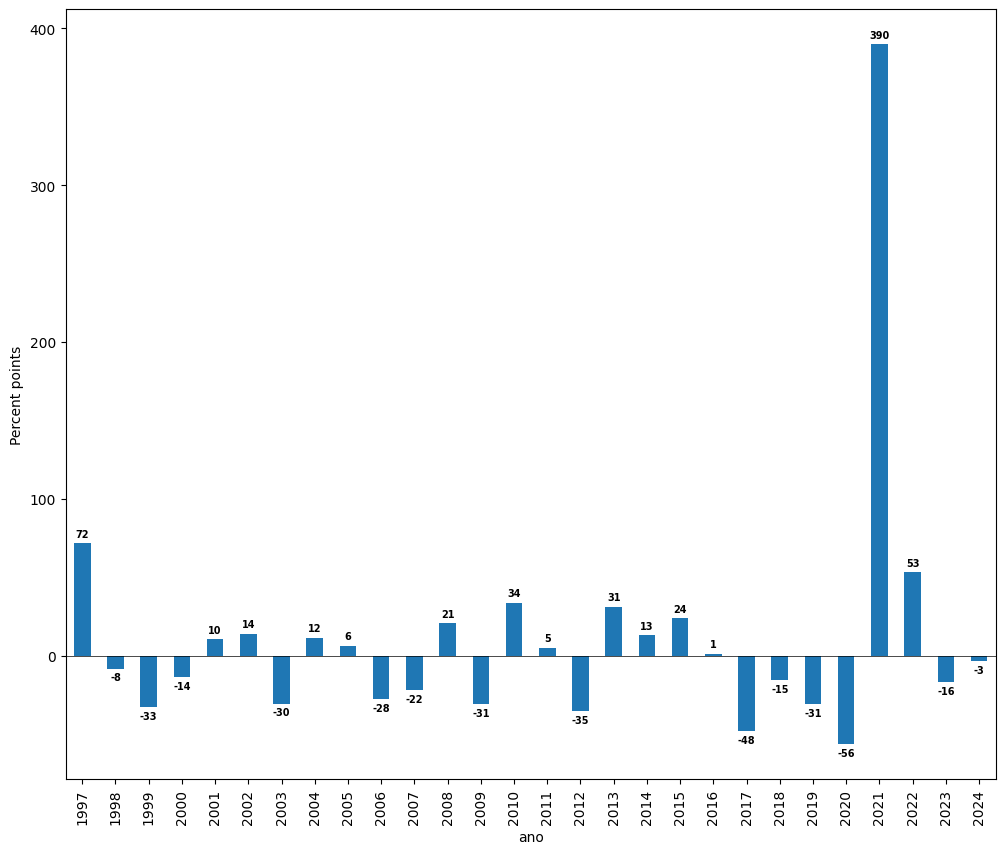

In [53]:
plot_annual_var(selic_pivmensal)

2021 was the year in which the brazillian inflation rate had the major positive increase while the year of 2020 had the lowest inflation rate. Both of those years were during the COVID-19 pandemic. Let's visualize both of these years.

<Axes: xlabel='mes'>

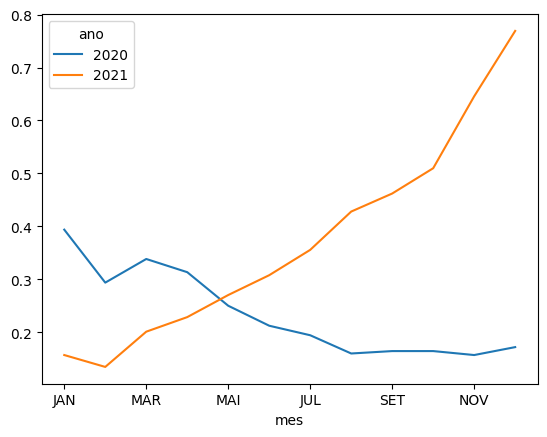

In [54]:
selic_pivmensal.loc[2020:2021, :].T.plot()

We can see a stark contrast: in 2020 the interest rate decreased, while in the following year, a major increase.

Which years saw the most volatility?

In [55]:
def plot_annual_vol(df: pd.DataFrame):
    '''A bar plot of the standard deviation across each row in a wide format table
    
    Parameter:
    ---
    df: pd.DataFrame
        DataFrame in the wide format
    '''
    plt.figure(figsize = (12, 10))
    ax = df.dropna().apply('std', axis = 1).plot(kind = 'bar')
    ax.axhline(y = 0, linewidth=.5, color='k')
    ax.bar_label(ax.containers[0], fmt=lambda x: round(x, 2), padding = 3, fontsize = 7, weight = 'bold')
    ax.set_ylabel('Volatility')
    plt.plot()

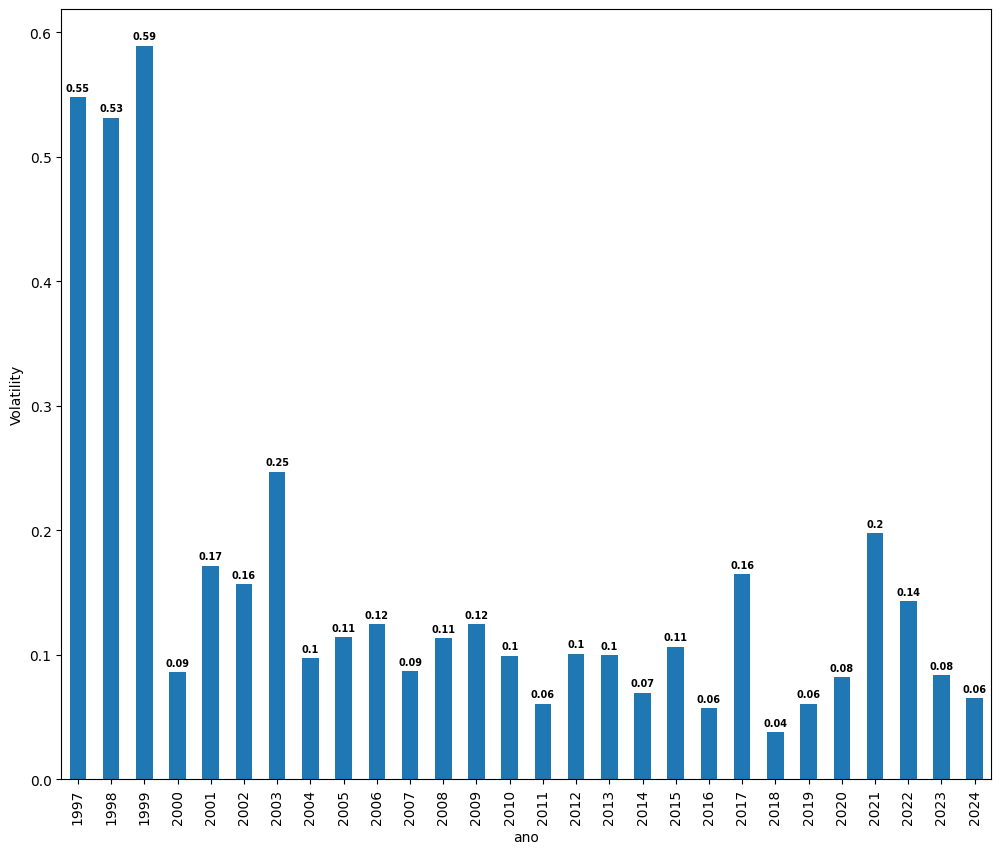

In [56]:
plot_annual_vol(selic_pivmensal)

Basically the trio 97, 98, 99. This periodo we saw a major fluctuation in the interest rate

To identidy which months had the highest and the lowest interest rate we can do the following plot

[]

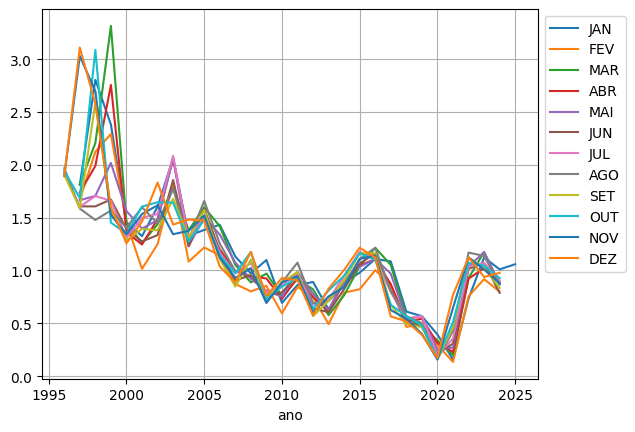

In [57]:
ax = selic_pivmensal.plot()
ax.legend(bbox_to_anchor=(1, 1))
ax.grid()
plt.plot()

This plot show us that, overall, there is a general decrease in the interest rate for each month over the years. The highest inflation rate occured in March 1999. The lowest is a little hard to see.

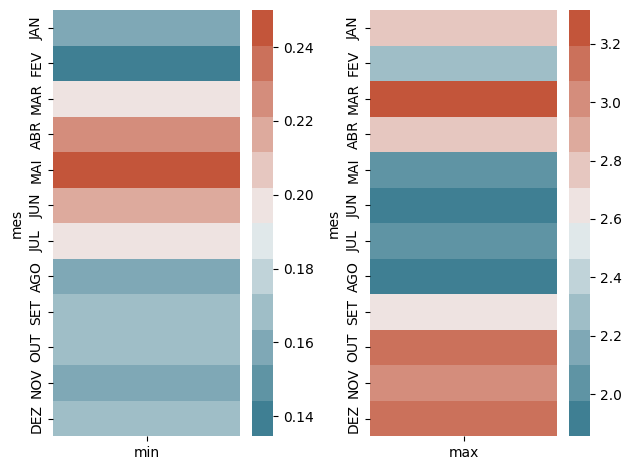

In [58]:
fig, axs = plt.subplots(1, 2)
selic_agg = selic_pivmensal.agg(['min', 'max'],  axis = 0)
sns.heatmap(
    selic_agg.loc['min', :].to_frame(), 
    cmap = sns.diverging_palette(220, 20, n=12),
    ax= axs[0])
sns.heatmap(
    selic_agg.loc['max', :].to_frame(), 
    cmap = sns.diverging_palette(220, 20, n=12), 
    ax= axs[1])
fig.tight_layout()

We can now see that is was february. Let's plot the annual interest rate.

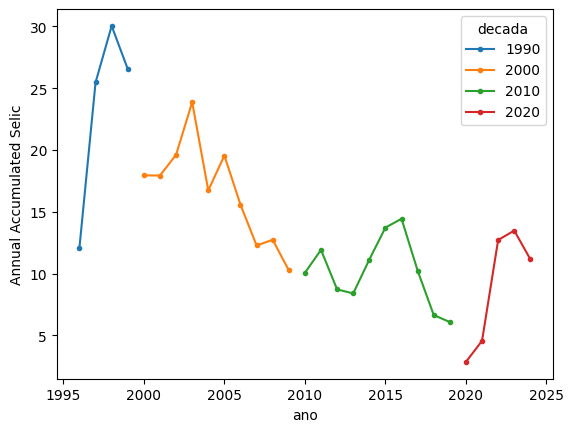

In [59]:
selic_anual_pivot = pd.pivot_table(
    selic_ipca_ano_df, 
    index = 'ano', 
    columns = 'decada', 
    values = 'selic_acumulada_ano', 
)
selic_anual_pivot.plot(style='.-')
plt.ylabel('Annual Accumulated Selic')
plt.show()

This line plot above clearly show us that after a peak at the end of the 90s, there is a decrease trend until the recent years, where an increase is observed. The lowest value happened at the Covid-19 pandemic.

Let's now analyze the inflation rate. We can start by pivoting the data.

In [60]:
ipca_pivot = selic_ipca_mes_df.pivot(index = 'ano', columns = 'mes', values = 'ipca_mes')
ipca_pivot.head()

mes,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ
ano,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,1.11,0.44,0.15,0.30,0.32,0.47
1997,1.18,0.50,0.51,0.88,0.41,0.54,0.22,-0.02,0.06,0.23,0.17,0.43
1998,0.71,0.46,0.34,0.24,0.50,0.02,-0.12,-0.51,-0.22,0.02,-0.12,0.33
1999,0.70,1.05,1.10,0.56,0.30,0.19,1.09,0.56,0.31,1.19,0.95,0.60
2000,0.62,0.13,0.22,0.42,0.01,0.23,1.61,1.31,0.23,0.14,0.32,0.59


Which year saw the highest change in the inflation rate (ipca)? And the lowest? Was there a negative variation? 

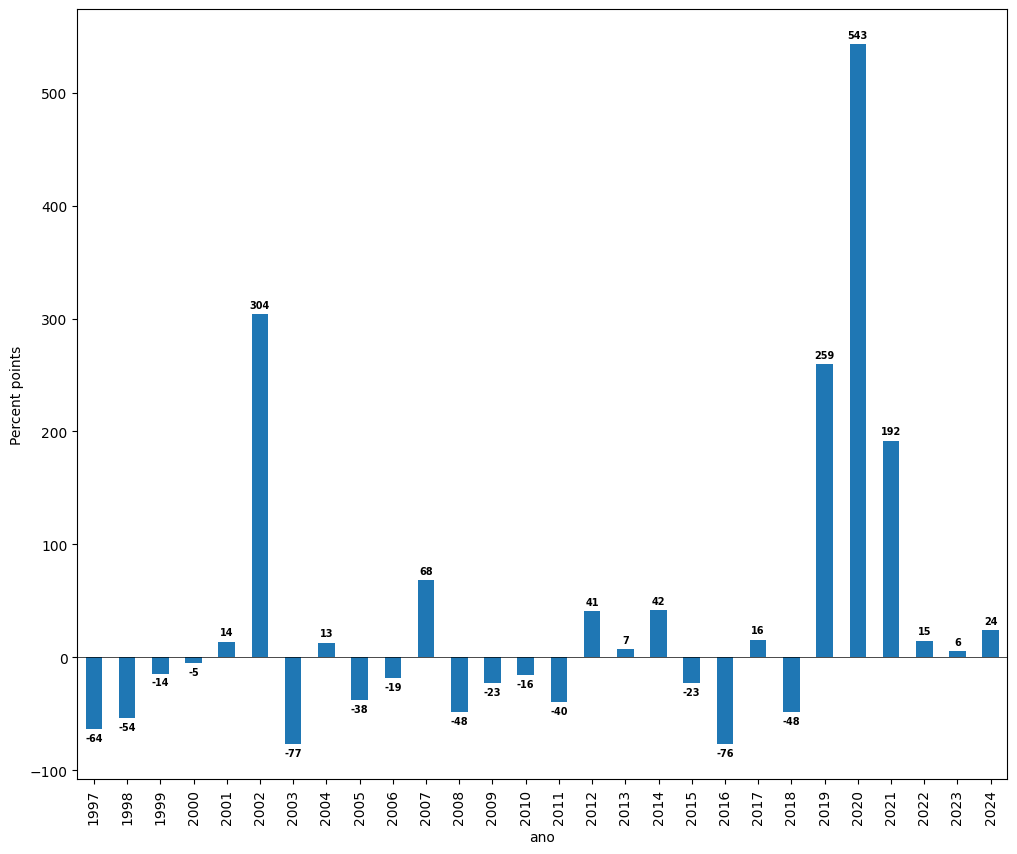

In [61]:
plot_annual_var(ipca_pivot)

The highest change occured in 2020, a year prior to the highest variation in the infation rate. The lowest positive value happened in 2023. The highest nevative variation happened in 2003. Let's visualize how both these years compare.

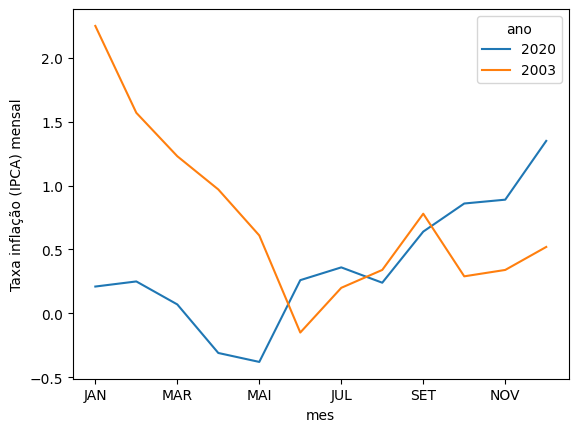

In [62]:
ipca_pivot.loc[[2020, 2003], :].T.plot()
plt.ylabel('Taxa inflação (IPCA) mensal')
plt.show()

The 2003 we had deflation in the month of June. June is also an inflection point, as it reversed the downward trend. In the case of 2020, the inflation rate began upwards trend after May.

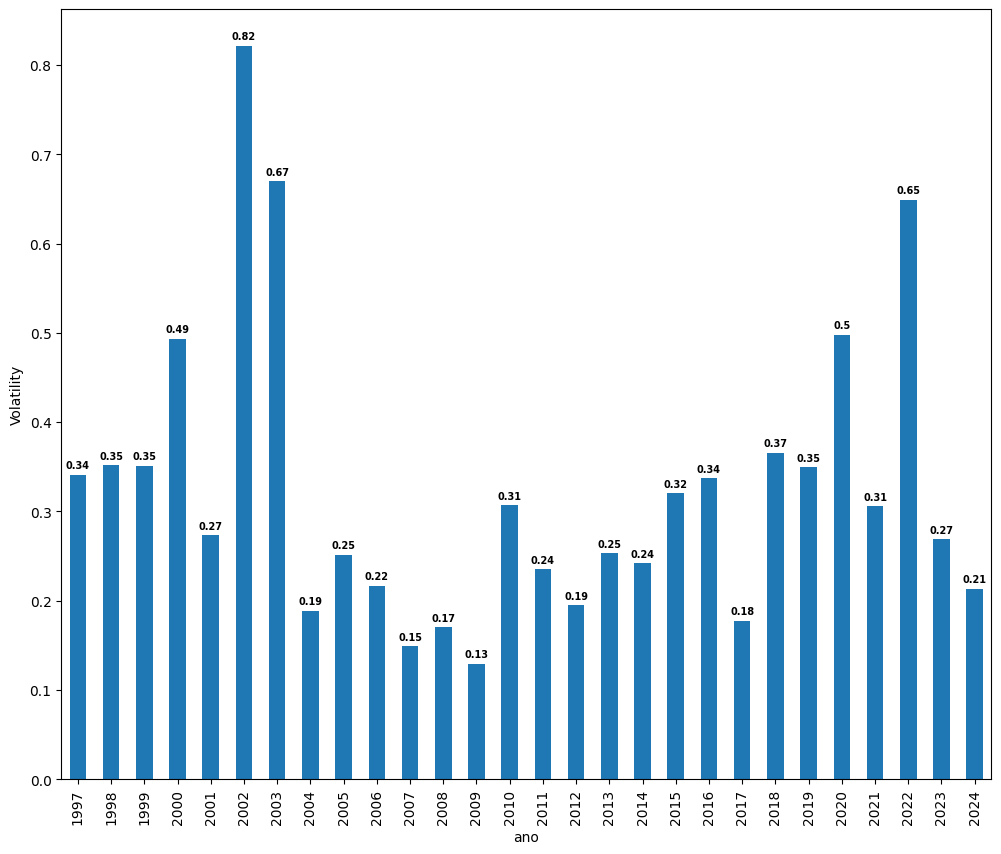

In [63]:
plot_annual_vol(ipca_pivot)

The highest volatililty occurs in the year 2002 while the lowest in 2009.

[]

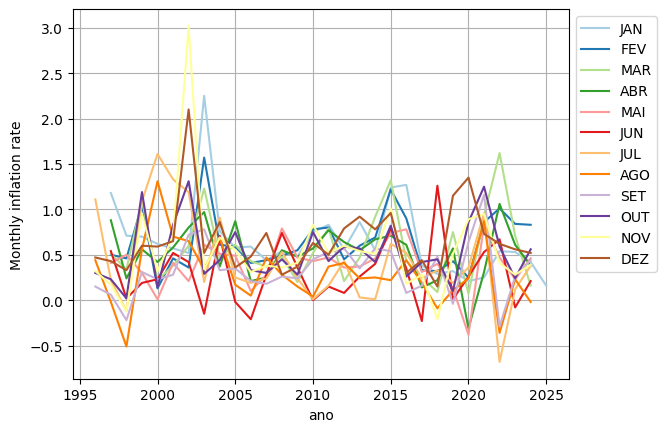

In [64]:
ax = ipca_pivot.plot(color = sns.color_palette('Paired', 12))
ax.set_ylabel('Monthly inflation rate')
ax.legend(bbox_to_anchor=(1, 1))
ax.grid()
plt.plot()

The biggest deflation occurred in July 2022 while the highest inflation was in November 2002.

Let's look a the annual data

[]

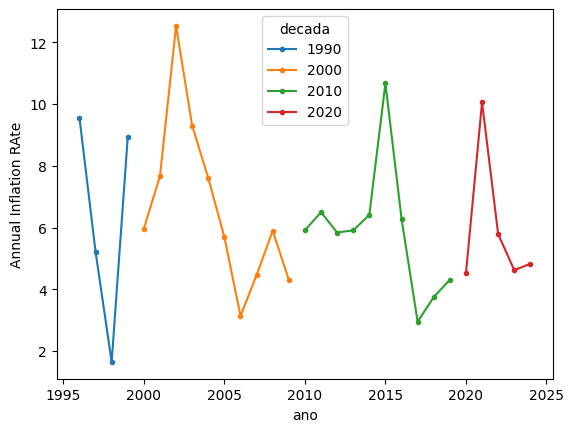

In [65]:
ipca_anual_pivot = pd.pivot_table(
    selic_ipca_ano_df, 
    index = 'ano', 
    columns = 'decada', 
    values = 'ipca_acumulado_ano', 
)
ipca_anual_pivot.plot(style='.-')
plt.ylabel('Annual Inflation RAte')
plt.plot()

The lowest value occured in 1998 and it was lower than 2 percent points. In the end of the 90s there was a significant surge that led the inflation rate to reach in 2002 its peak. Later we can see each decade had a well defined peak.

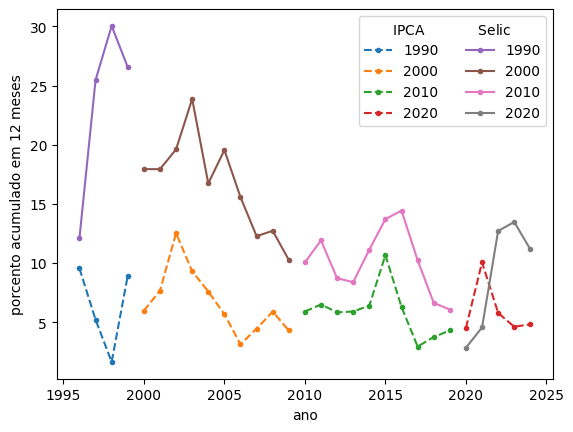

In [66]:
ax = ipca_anual_pivot.plot(style='.--')
selic_anual_pivot.plot(style='.-',ax = ax)
plt.legend(ncol=2, title=r'IPCA$\qquad\qquad$Selic')
plt.ylabel('porcento acumulado em 12 meses')
plt.show()

From this plot, we can see that with exception of the decade 1990, it seems that each peak in the inflation rate is followed by a peak in the interest rate. We can also see that the gap between the inflation and the interest rate are narrowing. In 2020 is the first time when the inflation rate was higher than the interest rate.

We can start to analyse each series. We are going to begin with month interest rate.

Text(0, 0.5, 'Taxa selic %')

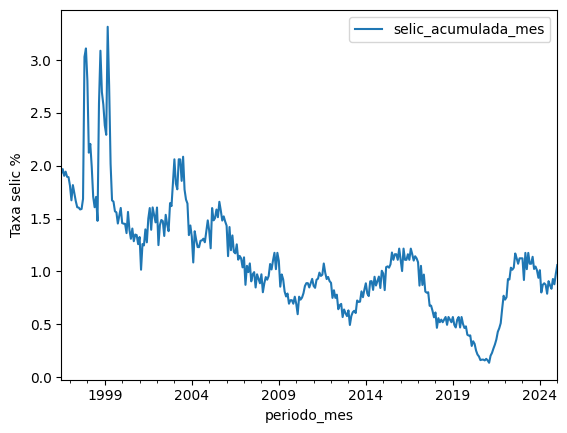

In [67]:
selic_ipca_mes_df.plot(x = 'periodo_mes', y = 'selic_acumulada_mes')
plt.ylabel('Taxa selic %')

From the above plot, we can really see a downward trend, so it this time series is not stationary. The time series does not seem to exhibit seasonality. It is also clear the high variablitly in the 1990s.

In [105]:
def plot_lowess_trend(x: pd.Series, y: pd.Series, xaxis_date: bool | None = None, grid: bool | None = None):
    '''Plot a lowess regression fitted 
    Parametros:
    ---
    x: pd.Series
        X
    y: pd.Series
        y
    xaxis_date: bool
        Used when y axis is in datetime format. If true, plot using the datetime format in x axis
    grid: bool, optional
        If True, plot grid.
    '''
    lowess_trend_x, lowess_trend_y = zip(*sm.nonparametric.lowess(exog = x, endog = y))

    if xaxis_date:
        lowess_trend_x = pd.to_datetime(lowess_trend_x)
    plt.plot(lowess_trend_x, y, '.', label = 'data')
    plt.plot(lowess_trend_x, lowess_trend_y, label = 'fitted')
    if grid:
        plt.grid()
    plt.show()

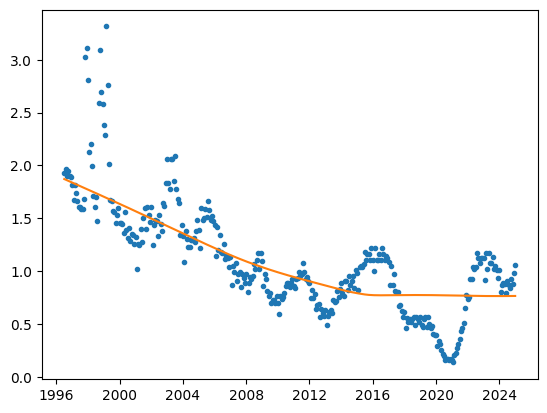

In [69]:
plot_lowess_trend(selic_ipca_mes_df['periodo_timeformat'], selic_ipca_mes_df['selic_acumulada_mes'])

From the regression, it is very clear that there is a downward trend. After this period, we have a constant trend. We can now test the stationarity

In [70]:
def adf_test(ts: pd.Series, reg: str | None = None) -> pd.DataFrame:
    '''Augmented Dickey-Fuller Test
    
    Parameters:
    ---
    ts: timeseries
        Series to be test
    reg: str, optional
        Trend. 

    Returns:
    ---
    res: pd.DataFrame
        Test result
    '''
    if reg == 'trend':
        reg = 'ct'
    elif reg == 'quad':
        reg  = 'ctt'
    else:
        reg = 'c'
    adf_res = smt.adfuller(ts, regression = reg)
    res = pd.DataFrame(adf_res[:2], index = ['adf stats', 'pval'], columns = ['adfuller test res'])
    return res


adf_test(selic_ipca_mes_df['selic_acumulada_mes'], 'trend')

,adfuller test res
adf stats,-3.602842
pval,0.029607


At a 5% significance level, we reject the null hypothesis and conclude that the series has no unit root, meaning the series may be stationary. However, the series does not exhibit the characteristics of stationarity. Is it trend-stationary, i.e., non-stationary but without a unit root?

In [71]:
def kpss_test(ts: pd.Series, reg: str | None = None) -> pd.DataFrame:
    '''KPSS test

    Parameters:
    ---
    ts: pd.Series
        Time series to be tested
    reg: 
        Trend 
    
    Returns:
    ---
    res: pd.DataFrame
        Test result
    '''
    if reg == 'trend':
        reg = 'ct'
    elif reg == 'constant' or reg is None:
        reg = 'c'
    else:
        print('reg é inválido')
    kpss_res = smt.kpss(ts, regression = reg)
    res = pd.DataFrame(kpss_res[:2], index = ['kpss stats', 'pval'], columns = ['KPSS test res'])
    return res

kpss_test(selic_ipca_mes_df['selic_acumulada_mes'], 'trend')

C:\Users\Mailson\AppData\Local\Temp\ipykernel_12596\718939552.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_res = smt.kpss(ts, regression = reg)


,KPSS test res
kpss stats,0.281824
pval,0.010000


There is evidence to reject the hypothesis that the series is trend-stationary in favor of the alternative hypothesis that the series has a unit root. Therefore, we have two tests with conflicting results, making the stationarity of the series inconclusive. Let's now examine if the series is difference-stationary, i.e., if the average trend is stochastic 

In [72]:
selic_ipca_mes_df = selic_ipca_mes_df.set_index('periodo_mes')

<Axes: xlabel='periodo_mes'>

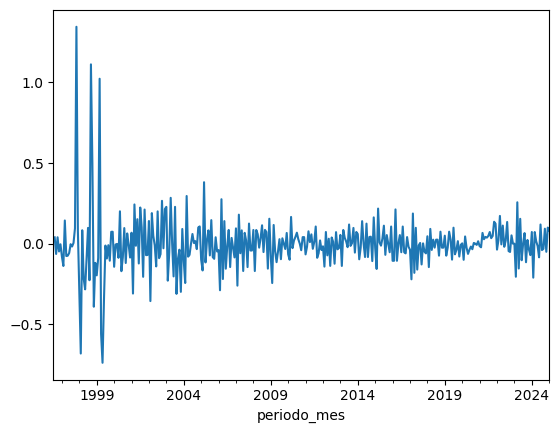

In [73]:
selic_dif = selic_ipca_mes_df['selic_acumulada_mes'].diff()
selic_dif.plot()

After differentiation, the series seems stationary

In [74]:
adf_test(selic_dif[1:])

,adfuller test res
adf stats,-5.032433
pval,0.000019


In [75]:
kpss_test(selic_dif[1:])

C:\Users\Mailson\AppData\Local\Temp\ipykernel_12596\718939552.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = smt.kpss(ts, regression = reg)


,KPSS test res
kpss stats,0.064601
pval,0.100000


We conclude, at a 5% significance level, that the differenced series is stationary. Therefore, the interest rate (Selic historical) series is difference-stationary. Notice that by differencing the series, we have eliminated the trend it previously exhibited

Let's examine if it exhibits seasonality

In [76]:
def stl_decomp_plot(data: pd.Series, period: int) -> None:
    '''Plot of the time series decomposition
    
    Parameters:
    ---
    data: pd.Serie
        Time series
    period: it
        Seasonality period
    '''
    
    data_decomp = smt.STL(data, period = period).fit()

    fig, axs = plt.subplots(4, 1, sharex=True)

    axs[0].plot(data_decomp.observed)
    axs[0].set_ylabel('Time series')
    
    axs[1].plot(data_decomp.trend)
    axs[1].set_ylabel('Trend')
    
    axs[2].plot(data_decomp.seasonal)
    axs[2].set_ylabel('Seaszonality')
    
    axs[3].plot(data_decomp.resid)
    axs[3].set_ylabel('Residues')

    plt.show()

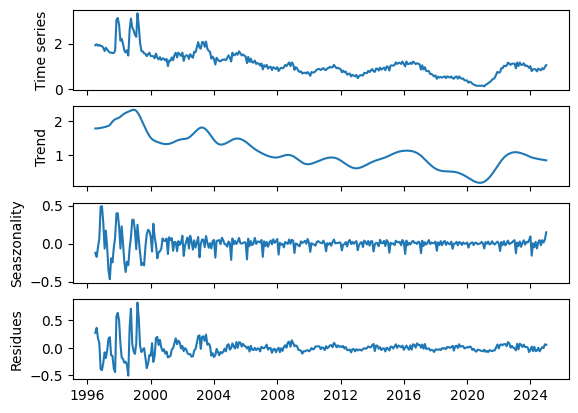

In [77]:
stl_decomp_plot(selic_ipca_mes_df[['selic_acumulada_mes', 'periodo_timeformat']].set_index('periodo_timeformat'), 12)

There is no apparent seasonality 

We will plot the autocorrelation function for the interest rate

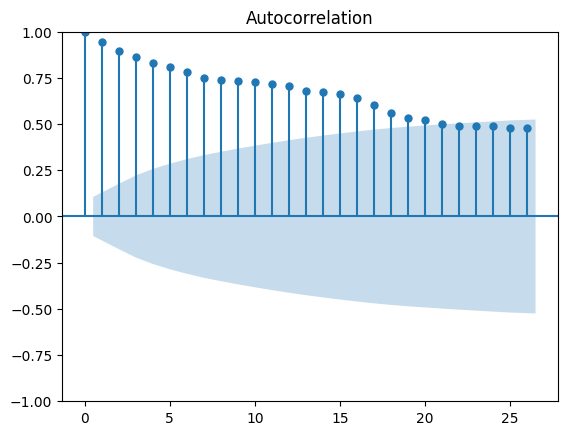

In [78]:
smg.tsa.plot_acf(selic_ipca_mes_df['selic_acumulada_mes']);

We can see a non-stationary time series pattern.

Let's see the distribution

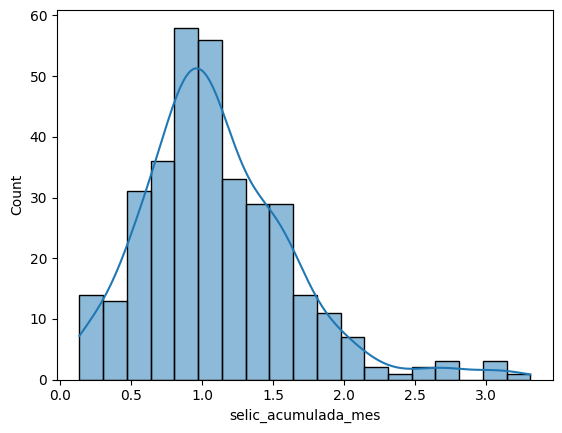

In [79]:
ax = sns.histplot(selic_ipca_mes_df['selic_acumulada_mes'], kde = True)

We have a right skewed non-normal distribution. This is due to the 90s interest rate.

In [80]:
selic_ipca_mes_df['selic_acumulada_mes'].describe().to_frame('Stats')

,Stats
count,343.000000
mean,1.106936
std,0.527624
min,0.134532
25%,0.783826
50%,1.034597
75%,1.395421
max,3.314907


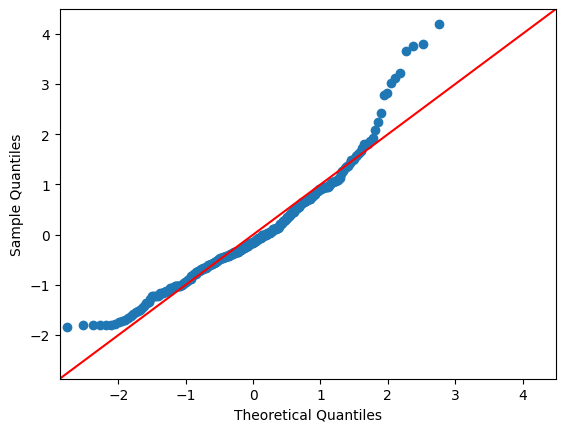

In [81]:
sm.qqplot(selic_ipca_mes_df['selic_acumulada_mes'], fit=True, line="45")
plt.show()

The series is not normal.

Let's do the same for the inflation rate.

<Axes: xlabel='periodo_mes'>

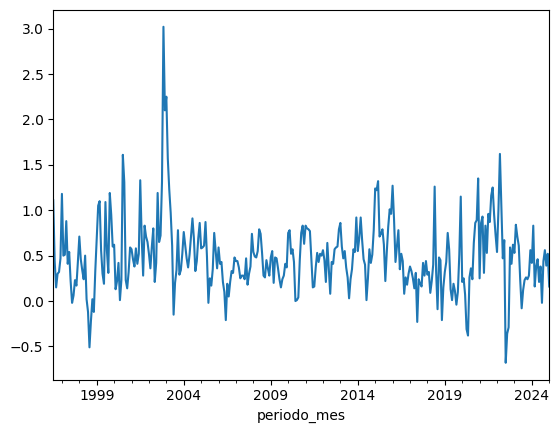

In [82]:
selic_ipca_mes_df['ipca_mes'].plot()

This time series seems to have constat mean, it does not exhibit seasonality.

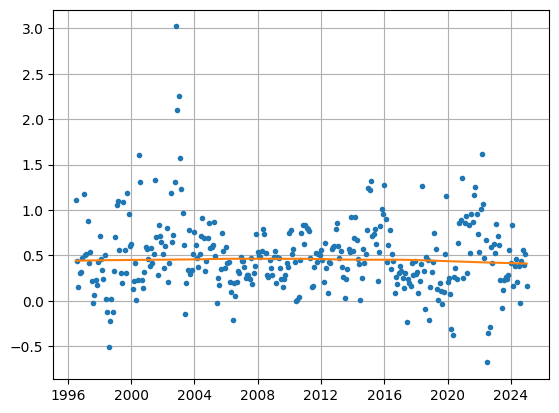

In [83]:
plot_lowess_trend(selic_ipca_mes_df['periodo_timeformat'] ,selic_ipca_mes_df['ipca_mes'], grid = True)

The time series seems to be independent of t. We now check if the seies is statistically stationary.

In [84]:
adf_test(selic_ipca_mes_df['ipca_mes'])

,adfuller test res
adf stats,-9.138364e+00
pval,2.894143e-15


At a 5% significance level, we reject the hypothesis that the series has a unit root. Let's perform the KPSS test to confirm this

In [85]:
kpss_test(selic_ipca_mes_df['ipca_mes'])

C:\Users\Mailson\AppData\Local\Temp\ipykernel_12596\718939552.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = smt.kpss(ts, regression = reg)


,KPSS test res
kpss stats,0.132773
pval,0.100000


We don't reject the null hypothesis and we conclude from both tests that the series is stationary.  
We may also check for seasonality

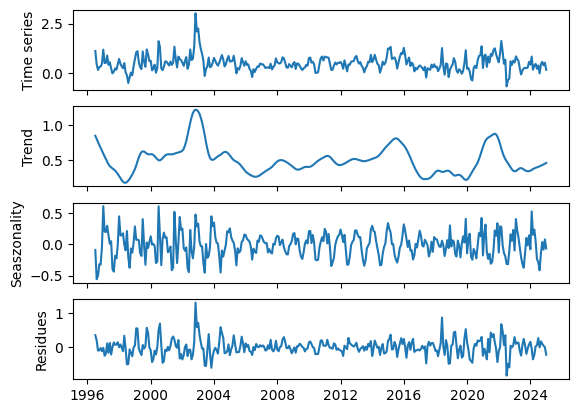

In [86]:
stl_decomp_plot(selic_ipca_mes_df[['ipca_mes', 'periodo_timeformat']].set_index('periodo_timeformat'), 12)

There is no seasonality.

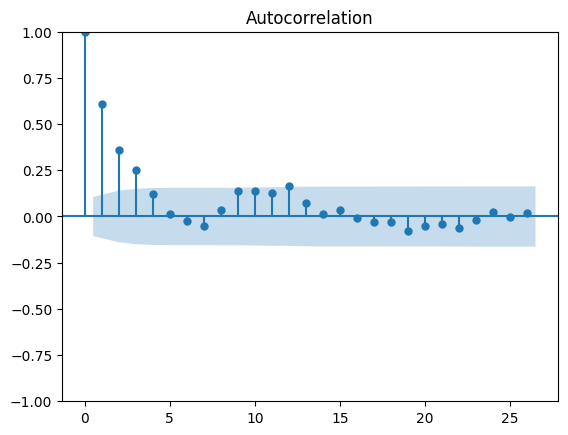

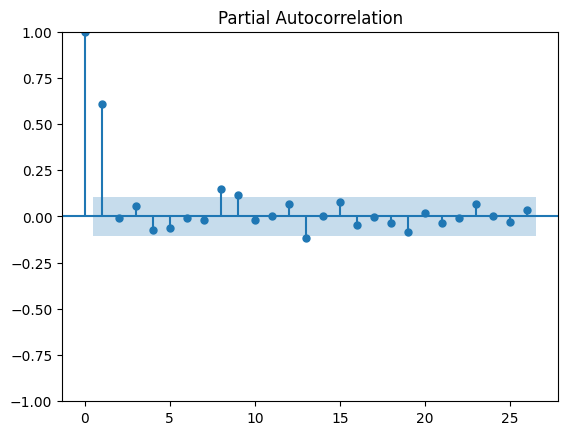

In [87]:
smg.tsa.plot_acf(selic_ipca_mes_df['ipca_mes']);
smg.tsa.plot_pacf(selic_ipca_mes_df['ipca_mes']);

Using the Box-Jenkings method, the both plots above tells us that the inflation rate time series is a AR(1) or even a ARMA(1,1) process. 

We can now check how is standard deviation over a 12-month window.

<Axes: xlabel='periodo_mes'>

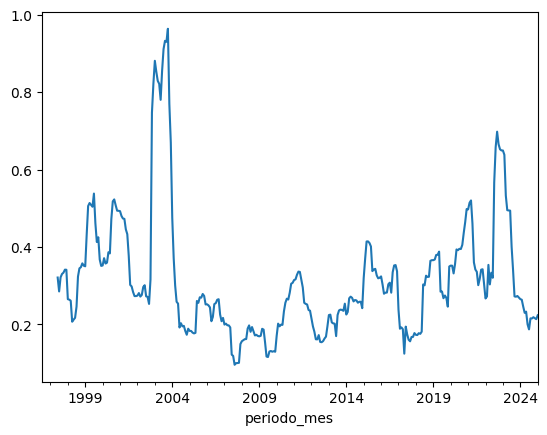

In [89]:
selic_ipca_mes_df['ipca_mes'].rolling(12).std().plot()

The highest observed values happened betwee 2003 and 2004

Now we can ask: do changes in the interest rate have any effect on the inflatin rate? We may answer this with a plot.

<Axes: xlabel='selic_acumulada_mes', ylabel='ipca_mes'>

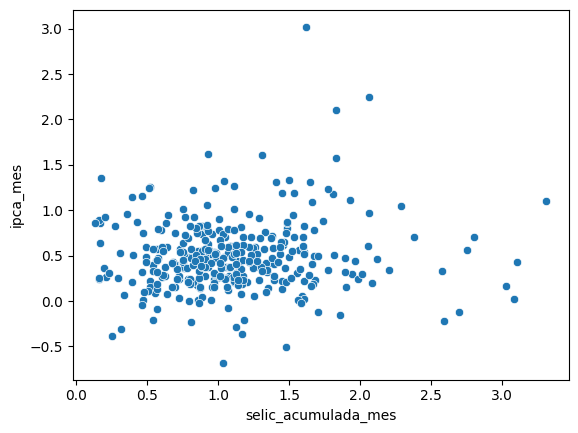

In [90]:
sns.scatterplot(selic_ipca_mes_df, y = 'ipca_mes', x = 'selic_acumulada_mes')

Let's check if there is correlation.

In [91]:
def plot_scatter(x: np.array, y: np.array, reg : bool | None = None, order: int | None = None) -> None:
    '''Plot a scatter plot and shows the correlation value

    Parameters
    ---
    x: np.array
        X
    y: np.array
        y
    reg: bool, optional
        If true, display the regression line
    order: bool, optional
        Regression order
    '''
    
    fig, ax = plt.subplots()

    if reg:
        if order is None:
            order = 1
        sns.regplot(x = x, y = y, order = order, ax = ax, line_kws={"color": "C1"})
    else:
        ax.scatter(x, y)

    data_vals = pd.DataFrame(np.c_[x, y], columns = ['x', 'y']).dropna()
    corr, pval = stats.pearsonr(data_vals['x'], data_vals['y'])
    
    ax.set_title('corr = {:.2f}  pval = {:.2e}'.format(corr, pval))
    plt.show()

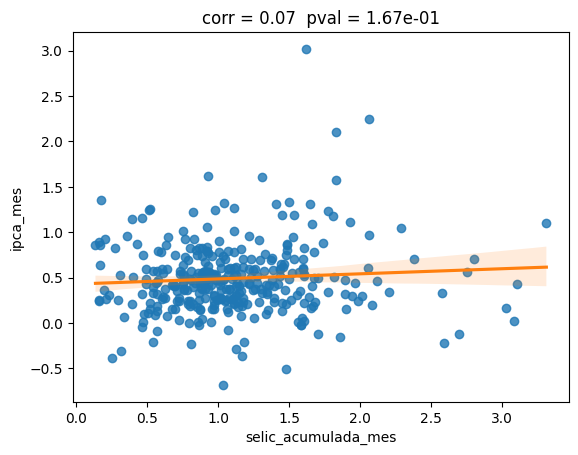

In [92]:
plot_scatter(selic_ipca_mes_df['selic_acumulada_mes'], selic_ipca_mes_df['ipca_mes'], reg = True)

It seems they have a linear association, however the correlation is very low. We may check the cross correlation for more leads

In [93]:
def plot_ccf(ts1: np.array, ts2: np.array, lags: int | None = None, grid: bool | None = None) -> None:
    '''Plot the cross correlation between two time series
    
    Parametros:
    ---
    ts1: np.array
        Time series 1
    ts2: np.array
        Time series 2
    lags: int, optional
        How many lags to plot
    grid: bool, optional
        If True, plot grid
    '''
    if not lags:
        lags = 25
    backwards = smt.ccf(ts1[::-1], ts2[::-1], nlags = lags, adjusted=False)[::-1]
    forwards = smt.ccf(ts1, ts2, nlags = lags, adjusted=False)
    ccf_output = np.r_[backwards[-lags:], forwards[1:lags]]
    x_range = range(-len(ccf_output)//2 + 1, len(ccf_output)//2 + 1)
    
    plt.stem(x_range,  ccf_output)
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    
    conf_int_inf, conf_int_sup = -1.96/np.sqrt(len(ts1)), 1.96/np.sqrt(len(ts2))
    plt.fill_between(x_range, conf_int_inf, conf_int_sup, alpha=0.2)

    if grid:
        plt.grid()
    plt.show()

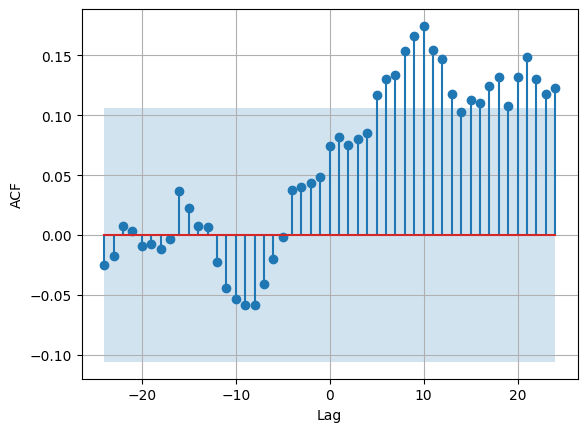

In [94]:
plot_ccf(selic_ipca_mes_df['selic_acumulada_mes'], selic_ipca_mes_df['ipca_mes'], grid = True)

We have a peak at lag 10, indicating that the inflation rate at t has more correlation with the interest rate at lag t + 10. Given that each lag corresond toa month, then the interest rate lags inflation rate by 10 months. Still, it is import to highlight that the correlation is still low.

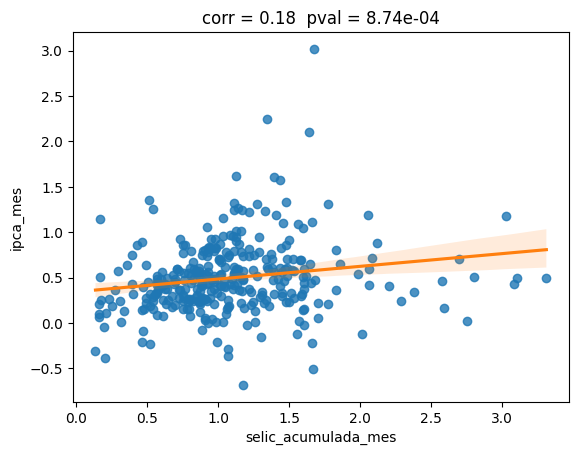

In [95]:
plot_scatter(selic_ipca_mes_df['selic_acumulada_mes'].shift(-10), selic_ipca_mes_df['ipca_mes'], reg = True)